# Manufacturing Costs

### Key Insights

- Economies of Scale: The polynomial regression model showed that manufacturing costs decrease as production volume increases, indicating the presence of economies of scale.
- Model Selection: Polynomial regression provided a better fit to the data compared to linear regression, capturing the complexity of the relationship between production volume and cost.

### Future Directions

- Incorporate external factors like raw material price fluctuations and market demand into the model for more accurate cost predictions.
- Extend the model to predict costs in real-time for dynamic production planning.
- Explore more advanced regression techniques and machine learning models for further optimization.

In [4]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import joblib

In [8]:
# Load the CSV file
csv_file_name = 'EconomiesOfScale.csv'

if os.path.exists(csv_file_name):
    df = pd.read_csv(csv_file_name)
    print("\nDataset Loaded Successfully!")
else:
    raise FileNotFoundError(f"Error: {csv_file_name} not found. Please ensure the file is in the correct directory.")

# Preview the dataset
print("\nDataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values Summary:")
print(df.isnull().sum())


Dataset Loaded Successfully!

Dataset Preview:
   Number of Units  Manufacturing Cost
0         1.000000           95.066056
1         1.185994           96.531750
2         1.191499           73.661311
3         1.204771           95.566843
4         1.298773           98.777013

Missing Values Summary:
Number of Units       0
Manufacturing Cost    0
dtype: int64



Dataset Statistics:
       Number_of_Units  Manufacturing_Cost
count      1000.000000         1000.000000
mean          4.472799           40.052999
std           1.336241           10.595322
min           1.000000           20.000000
25%           3.594214           32.912036
50%           4.435958           38.345781
75%           5.324780           44.531822
max          10.000000          100.000000


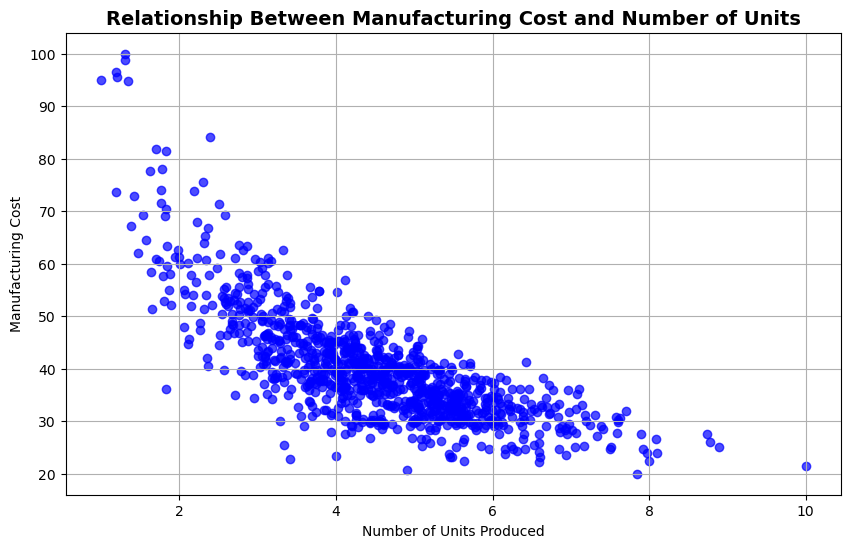

In [9]:
# EDA 

# Rename columns for easier access (if necessary)
df.columns = ['Number_of_Units', 'Manufacturing_Cost']

# Basic statistics
print("\nDataset Statistics:")
print(df.describe())

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Number_of_Units'], df['Manufacturing_Cost'], alpha=0.7, color='blue')
plt.title('Relationship Between Manufacturing Cost and Number of Units', fontsize=14, fontweight='bold')
plt.xlabel('Number of Units Produced')
plt.ylabel('Manufacturing Cost')
plt.grid(True)
plt.show()

In [10]:
# Prepare the Data for Modeling

# Split the data into train and test sets
X = df[['Number_of_Units']]
y = df['Manufacturing_Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining and Test Set Sizes:")
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")



Training and Test Set Sizes:
Training set: (800, 1), Test set: (200, 1)


In [11]:
# Develop and Evaluate the Model
# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

print("\nModel Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-Squared (R²):", r2_score(y_test, y_pred))


Model Evaluation Metrics:
Mean Absolute Error (MAE): 4.513943834797746
Mean Squared Error (MSE): 35.19738891578312
R-Squared (R²): 0.5695897011831417


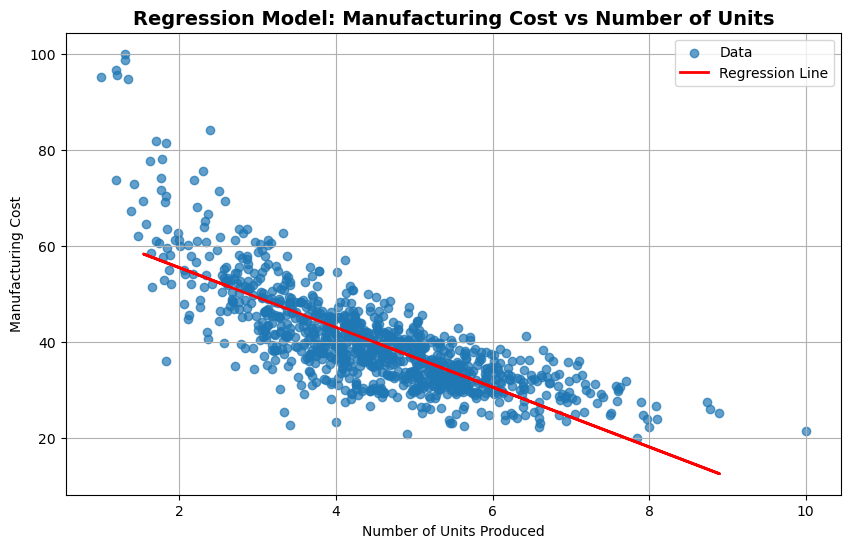

In [12]:
# Visualize the Model
# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line', linewidth=2)
plt.title('Regression Model: Manufacturing Cost vs Number of Units', fontsize=14, fontweight='bold')
plt.xlabel('Number of Units Produced')
plt.ylabel('Manufacturing Cost')
plt.legend()
plt.grid(True)
plt.show()

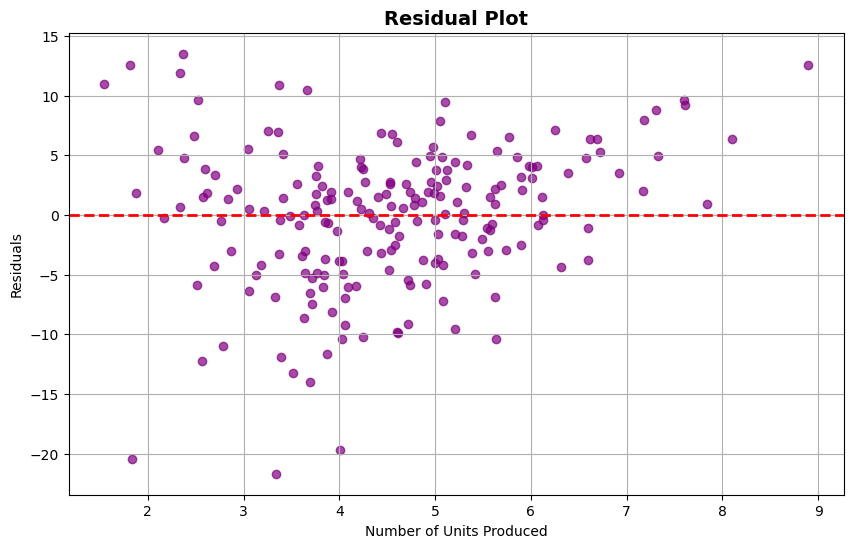

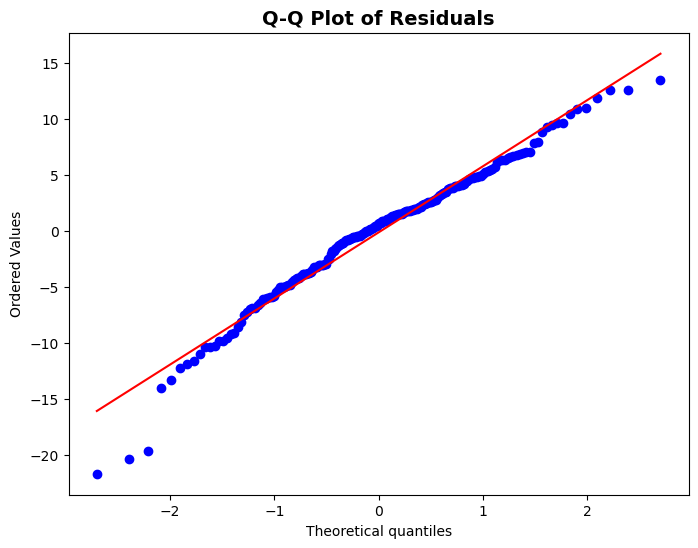

In [13]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(X_test, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot', fontsize=14, fontweight='bold')
plt.xlabel('Number of Units Produced')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Check normality of residuals

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals', fontsize=14, fontweight='bold')
plt.show()


Polynomial Model Evaluation Metrics:
Mean Absolute Error (MAE): 4.372292708304973
Mean Squared Error (MSE): 33.22656710889019
R-Squared (R²): 0.5936898412489064


C:\Users\milto\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


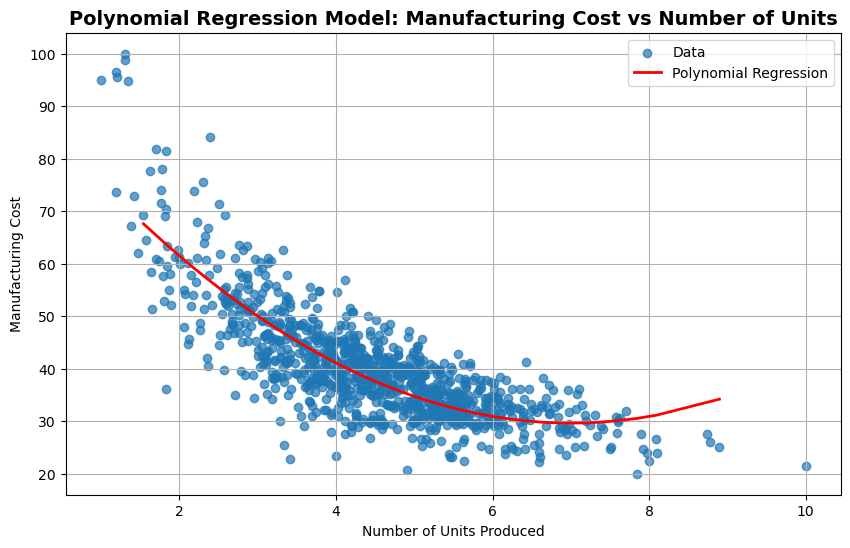

In [14]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_model = make_pipeline(poly, LinearRegression())

# Train the polynomial regression model
poly_model.fit(X_train, y_train)

# Predict and evaluate
poly_y_pred = poly_model.predict(X_test)

print("\nPolynomial Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, poly_y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, poly_y_pred))
print("R-Squared (R²):", r2_score(y_test, poly_y_pred))

# Plot polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(
    sorted(X_test.values.flatten()), 
    poly_model.predict(sorted(X_test.values.reshape(-1, 1))), 
    color='red', label='Polynomial Regression', linewidth=2
)
plt.title('Polynomial Regression Model: Manufacturing Cost vs Number of Units', fontsize=14, fontweight='bold')
plt.xlabel('Number of Units Produced')
plt.ylabel('Manufacturing Cost')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#  Save and Document the Model

model_file = 'manufacturing_cost_model.pkl'
joblib.dump(model, model_file)
print(f"\nModel saved as {model_file}.")



Model saved as manufacturing_cost_model.pkl.
